In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('daily-temperature.csv', parse_dates=True)

In [7]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [12]:
df.set_index('Date', inplace=True)

In [13]:
df


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


# Line & Scatter Plot

<AxesSubplot:xlabel='Date'>

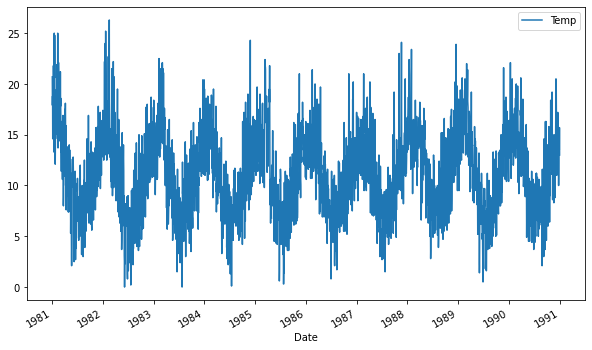

In [15]:
df.plot(figsize=(10,6))

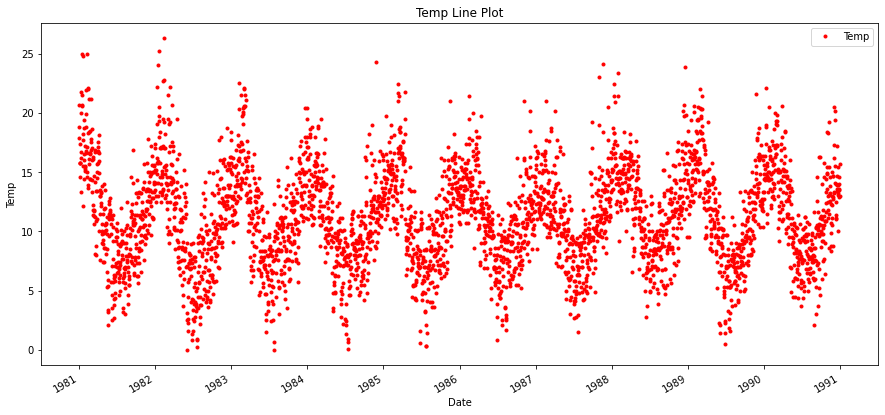

In [20]:
df.plot(style = '.', figsize=(15,7), color = 'red')
plt.ylabel ('Temp')
plt.title('Temp Line Plot')
plt.show()

# subplots

In [21]:
groups = df.groupby(pd.Grouper(freq='A'))

In [22]:
groups

In [26]:
keys = groups.groups.keys()

In [27]:
groups.get_group('1982-12-31')

,Temp
Date,
1982-01-01,17.0
1982-01-02,15.0
1982-01-03,13.5
1982-01-04,15.2
1982-01-05,13.0
...,...
1982-12-27,15.3
1982-12-28,16.3
1982-12-29,15.8


In [30]:
key

Timestamp('1990-12-31 00:00:00', freq='A-DEC')

In [32]:
groups.get_group(key)['Temp'].values

array([14.8, 13.3, 15.6, 14.5, 14.3, 15.3, 16.4, 14.8, 17.4, 18.8, 22.1,
       19. , 15.5, 15.8, 14.7, 10.7, 11.5, 15. , 14.5, 14.5, 13.3, 14.3,
       14.3, 20.5, 15. , 17.1, 16.9, 16.9, 13.6, 16.4, 16.1, 12. , 12.2,
       14.8, 14.8, 14.4, 12.9, 13.4, 15.9, 16.1, 17.6, 15.6, 15. , 13. ,
       14.1, 17.3, 15.7, 18.6, 12.7, 14. , 13.7, 16.3, 20. , 17. , 15.2,
       16.5, 16.5, 17.3, 19.1, 19.3, 17.3, 19. , 19.8, 19.3, 17.2, 14.2,
       10.3, 13. , 15.3, 15. , 12.1,  9.2, 11. , 15. , 11.6, 11.6, 15.1,
       15. , 13.6, 12.5, 14.3, 16. , 17.4, 16.9, 18. , 20.6, 14.2, 10.9,
       11.9, 13.3, 15.3, 14.7, 11. , 12.2, 14.2, 17. , 15.8, 15.2, 15.1,
       14.7, 18.5, 16.4, 18.4, 15.1,  9.9, 10.2, 12.6, 13.2, 11.5, 13.8,
       14.5, 14.7, 11.2, 12.7, 13.7, 11.5, 10.4,  8.9, 11.1,  9.5, 13. ,
       13.9, 12.6, 14.3, 16. , 13.3,  7. ,  4.9,  6.9, 13.7, 10.6, 12.3,
       11.1, 10.2,  9.5,  8.9, 13.4,  9.1,  9.4,  8.7,  5.8,  4.5,  7.2,
       10. , 10.5, 10.7,  8.2,  6.1,  4.5,  6.1,  9

In [33]:
years = pd.DataFrame()
for key in keys:
    years[key]=groups.get_group(key)['Temp'].values

In [34]:
years

,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


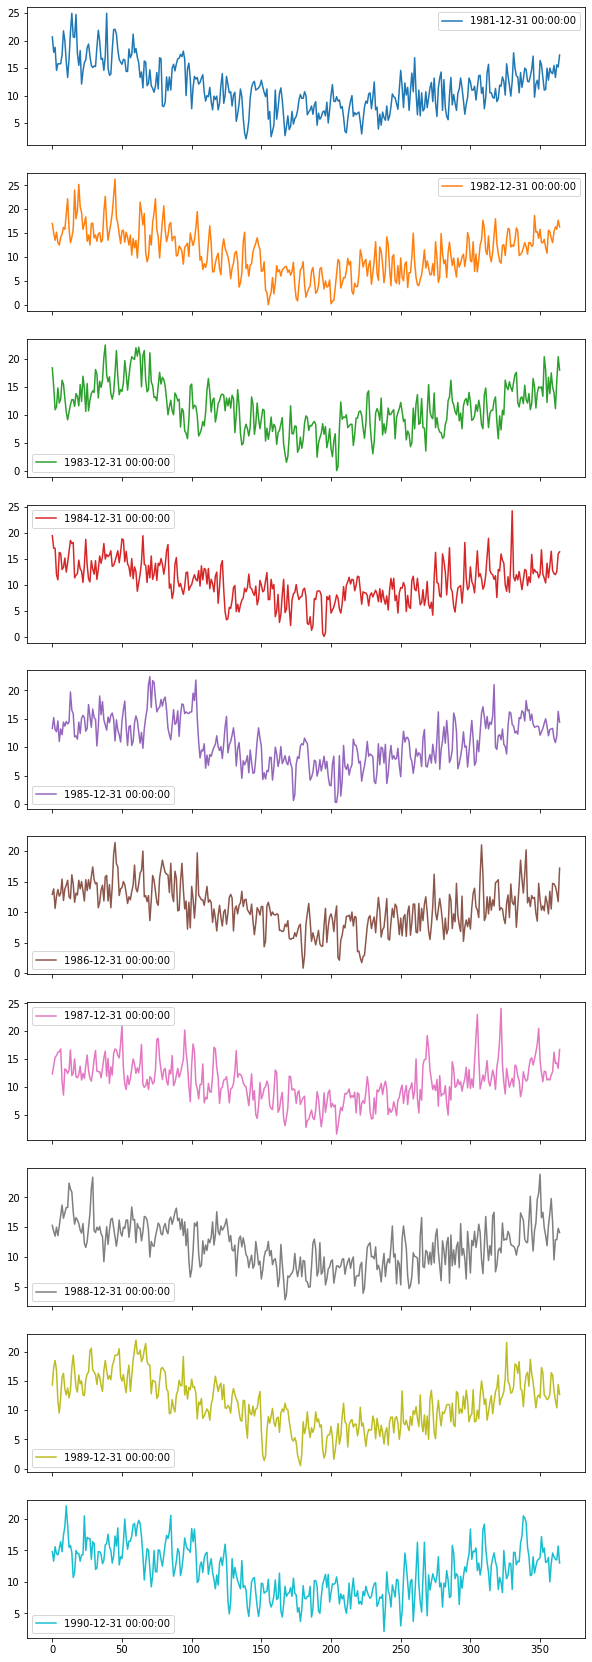

<Figure size 432x288 with 0 Axes>

In [38]:
years.plot(subplots = True, figsize=(10,30))
plt.show()
plt.tight_layout()